# Introduction :--

-  **Project Title :-**  Energy_Consumption_and_Prediction

*  **Problem Statement :-** Increasing energy demand makes it hard to manage resources efficiently.

* **Project Aim :-**  The aim of the this project is to analyze the household electric power consumption dataset and extract meaningful insights. This could involve understanding consumption patterns, identifying peak usage times, and predicting future power consumption.

* **Project Dataset :-**
The "Household Power Consumption" dataset contains measurements of electric power consumption in a single household over a period of time. The data includes details recorded every minute Dec 2006 to Nov 2010.

*  **In-Detailed Overview :-**
  

| **Rows**     | **Columns** | **Time Period**         | **Granularity**          |
|--------------|-------------|-------------------------|---------------------------|
| 2,075,259    |     9           | Dec 2006 - Nov 2010    | Data is recorded every minute |

- **Columns Description :-**

| **Feature**              | **Description**                                                                                               | **Data Type**       |
|--------------------------|---------------------------------------------------------------------------------------------------------------|---------------------|
| **Date**                 | The date of the observation in the format DD/MM/YYYY.                                                        | Object              |
| **Time**                 | The time of the observation in the format HH:MM:SS.                                                          | Object              |
| **Global_active_power**  | Household global active power in kilowatts (kW). Total power consumed by the household appliances.           | Numeric             |
| **Global_reactive_power**| Household global reactive power in kilovolt-amperes reactive (kVAR).                                         | Numeric             |
| **Voltage**              | Voltage (in volts) supplied to the house during the given minute.                                            | Object initially; should be numeric |
| **Global_intensity**     | Current intensity in amperes (A). Total electrical current being drawn at that moment.                       | Object initially; should be numeric |
| **Sub_metering_1**       | Energy sub-metering for the kitchen (in watt-hours of active energy). Ex :- Dishwasher, oven.  | Object initially; should be numeric |
| **Sub_metering_2**       | Energy sub-metering for the laundry room (in watt-hours of active energy). Ex :- Washing machine.         | Object initially; should be numeric |
| **Sub_metering_3**       | Energy sub-metering for electric water-heater and air-conditioning systems (in watt-hours of active energy). | Float64             |
| **Missing Values**       | The dataset contains missing values, particularly in the Sub_metering_3 column (about 1.25% of the data).    | -                   |

---

### Data Readiness :--

In [ ]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

we have importing these libraries in Python. It is neccessary

In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1bvaXJJqNObOCkX-i475BNxpidk024pyx/view?usp=sharing

Downloading...
From (original): https://drive.google.com/uc?id=1bvaXJJqNObOCkX-i475BNxpidk024pyx
From (redirected): https://drive.google.com/uc?id=1bvaXJJqNObOCkX-i475BNxpidk024pyx&confirm=t&uuid=b2040dfa-b422-420e-aea3-956a75c7f3db
To: /content/household_power_consumption.txt
100% 133M/133M [00:01<00:00, 111MB/s]


Downloading the file from google drive.

In [ ]:
df=pd.read_csv('/content/household_power_consumption.txt',sep=";")
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


Reading the file from the system.

---

### Data Preparation :--
Check the shape and column information of the dataset to understand the data types and structure.

#### df.info()
It Provides concise information about the DataFrame, including the number of non-null values, the data type of each column, and memory usage.

Total entries: Total number of rows.

Data types: Shows the data type of each column (e.g., int64, float64, object).

Null values: Indicates whether a column has missing values.

Memory usage: Gives an idea of how much memory the DataFrame is using

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


---

### Data Conversion :--

In [ ]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'],errors = 'coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'],errors = 'coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'],errors = 'coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'],errors = 'coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'],errors = 'coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'],errors = 'coerce')
df['Sub_metering_3'] = pd.to_numeric(df['Sub_metering_3'],errors = 'coerce')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


---

### Data Exploration :--

### df.head()
it Displays the first 5 rows of the DataFrame by default, though you can specify any number of rows to display.

usage:

Gives a quick look at the first few rows of the dataset.

it also Helps to verify if the data was loaded correctly and whether the columns are in the expected format

In [ ]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


### df.tail()
it Displays the last 5 rows of the DataFrame by default, but you can specify the number of rows.

usage:

it  Helps to inspect the most recent or last entries in the dataset, which can be useful for time-series data to ensure data continuity.

In [ ]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


## df.shape
It Provides the dimensions of the DataFrame as a tuple (rows, columns).

Quick check to know the number of rows and columns in the dataset
from the dataset we can observe there are 2075259 columns and 9 rows

In [ ]:
df.shape

(2075259, 9)

### df.columns
Lists all column names in the DataFrame.

In [ ]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

### df.describe()
This function provides summary statistics for the numerical columns in the dataset.

###### Count: The number of non-null values.

##### Mean: The average of the column.

##### Standard Deviation (std): Shows how much the values deviate from the mean.

Min, 25th percentile, 50th percentile (median), 75th percentile, Max: These values help in understanding the spread and distribution of the data.

In [ ]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


### df.describe(include="object")

This function helps you analyze categorical or non-numeric data. When applied to object-type columns, it summarizes these columns by providing:

Count: The number of non-null entries in each column.

Unique: The number of unique values in the column.

Top: The most frequent (or "top") value in the column.

Freq: The frequency of the most common value (i.e., how often the "top" value appears)

In [ ]:
df.describe(include="object")

,Date,Time
count,2075259,2075259
unique,1442,1440
top,25/11/2010,19:44:00
freq,1440,1442


### Checking for Null Values (df.isnull() and df.isnull().sum())
df.isnull() checks if there are any missing values in each cell, and df.isnull().sum() returns the number of missing values per column.

Usage:

To identify missing or null values that may need handling.

Useful to understand if imputation or dropping missing values is required for certain columns.

In [ ]:
df.isnull().any()

,0
Date,False
Time,False
Global_active_power,True
Global_reactive_power,True
Voltage,True
Global_intensity,True
Sub_metering_1,True
Sub_metering_2,True
Sub_metering_3,True


In [ ]:
df.isnull().sum()

,0
Date,0
Time,0
Global_active_power,25979
Global_reactive_power,25979
Voltage,25979
Global_intensity,25979
Sub_metering_1,25979
Sub_metering_2,25979
Sub_metering_3,25979


## null_percentage
This will help us to check the percentage of missing values for each column in the DataFrame

In [ ]:
null_percentage = (df.isnull().sum() / len(df)) * 100
null_percentage

,0
Date,0.000000
Time,0.000000
Global_active_power,1.251844
Global_reactive_power,1.251844
Voltage,1.251844
Global_intensity,1.251844
Sub_metering_1,1.251844
Sub_metering_2,1.251844
Sub_metering_3,1.251844


### **Handling null values**

### Fill with the column's with mean

choosing mean method to fill nan values

In [ ]:
df['Sub_metering_3'].fillna(df['Sub_metering_3'].mean(), inplace=True)
df['Global_reactive_power'].fillna(df['Global_reactive_power'].mean(), inplace=True)
df['Global_active_power'].fillna(df['Global_active_power'].mean(), inplace=True)
df['Voltage'].fillna(df['Voltage'].mean(), inplace=True)
df['Global_intensity'].fillna(df['Global_intensity'].mean(), inplace=True)
df['Sub_metering_1'].fillna(df['Sub_metering_1'].mean(), inplace=True)
df['Sub_metering_2'].fillna(df['Sub_metering_2'].mean(), inplace=True)

df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


checking weather null values are present are not

In [ ]:
df.isnull().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0


---

### Data Encoding :--

##### 1. Converting date and time from string to date(Year, Month, Day) & time(Hours, minutes) format :--

In [ ]:
# Combine 'Date' and 'Time' columns into a single datetime column
df['Date_Time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Extract year, month, day, hour, and minute from the 'Date_Time' column
df['Year'] = df['Date_Time'].dt.year
df['Month'] = df['Date_Time'].dt.month
df['Day'] = df['Date_Time'].dt.day
df['Hour'] = df['Date_Time'].dt.hour
df['Minute'] = df['Date_Time'].dt.minute

df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Date_Time,Year,Month,Day,Hour,Minute
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00,2010,11,26,20,58
2075255,26/11/2010,20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00,2010,11,26,20,59
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00,2010,11,26,21,0
2075257,26/11/2010,21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00,2010,11,26,21,1
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0,2010-11-26 21:02:00,2010,11,26,21,2


#### 2. Finding whether the day is a holiday or not (0 = not holiday, 1= holiday) :--

In [ ]:
# Start of your data encoding
import datetime as dt

def is_holiday(date):
    year = int(date.split('/')[2])
    month = int(date.split('/')[1])
    day = int(date.split('/')[0])

    if dt.datetime(year, month, day).weekday() >= 5:
        return 1.0
    else:
        return 0.0

for data in [df]:
    data['Is_holiday'] = data['Date'].apply(lambda x: is_holiday(x))
    data['Light'] = data['Time'].apply(lambda x: 1 if isinstance(x, str) and int(x[:2]) >= 6 and int(x[:2]) < 18 else 0)
    data['Time'] = data['Time'].apply(lambda x: (int(x[:2]) * 60.0 + int(x[3:5])) / 1440.0 if isinstance(x, str) else 0)


In [ ]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Date_Time,Year,Month,Day,Hour,Minute,Is_holiday,Light
2075254,26/11/2010,0.873611,0.946,0.0,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00,2010,11,26,20,58,0.0,0
2075255,26/11/2010,0.874306,0.944,0.0,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00,2010,11,26,20,59,0.0,0
2075256,26/11/2010,0.875000,0.938,0.0,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00,2010,11,26,21,0,0.0,0
2075257,26/11/2010,0.875694,0.934,0.0,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00,2010,11,26,21,1,0.0,0
2075258,26/11/2010,0.876389,0.932,0.0,239.55,3.8,0.0,0.0,0.0,2010-11-26 21:02:00,2010,11,26,21,2,0.0,0


#### 3. Find if the there is sunlight during the time given in the dataset ( 0600-1800 hours) is 1 (light is there) else 0) :--

In [ ]:
# Create a new column 'Is_Daylight' based on the hour in 'Date_Time'
df['Is_Daylight'] = df['Hour'].apply(lambda x: 1 if 6 <= x < 18 else 0)

# Display the last few rows to confirm
df.tail()


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Date_Time,Year,Month,Day,Hour,Minute,Is_holiday,Light,Is_Daylight
2075254,26/11/2010,0.873611,0.946,0.0,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00,2010,11,26,20,58,0.0,0,0
2075255,26/11/2010,0.874306,0.944,0.0,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00,2010,11,26,20,59,0.0,0,0
2075256,26/11/2010,0.875000,0.938,0.0,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00,2010,11,26,21,0,0.0,0,0
2075257,26/11/2010,0.875694,0.934,0.0,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00,2010,11,26,21,1,0.0,0,0
2075258,26/11/2010,0.876389,0.932,0.0,239.55,3.8,0.0,0.0,0.0,2010-11-26 21:02:00,2010,11,26,21,2,0.0,0,0


---

## Data Visualization :--

# Framed Questions :--

### Q(1) : How does energy consumption vary over time?

##### 1. Line Plot of Energy Consumption Over Time :--

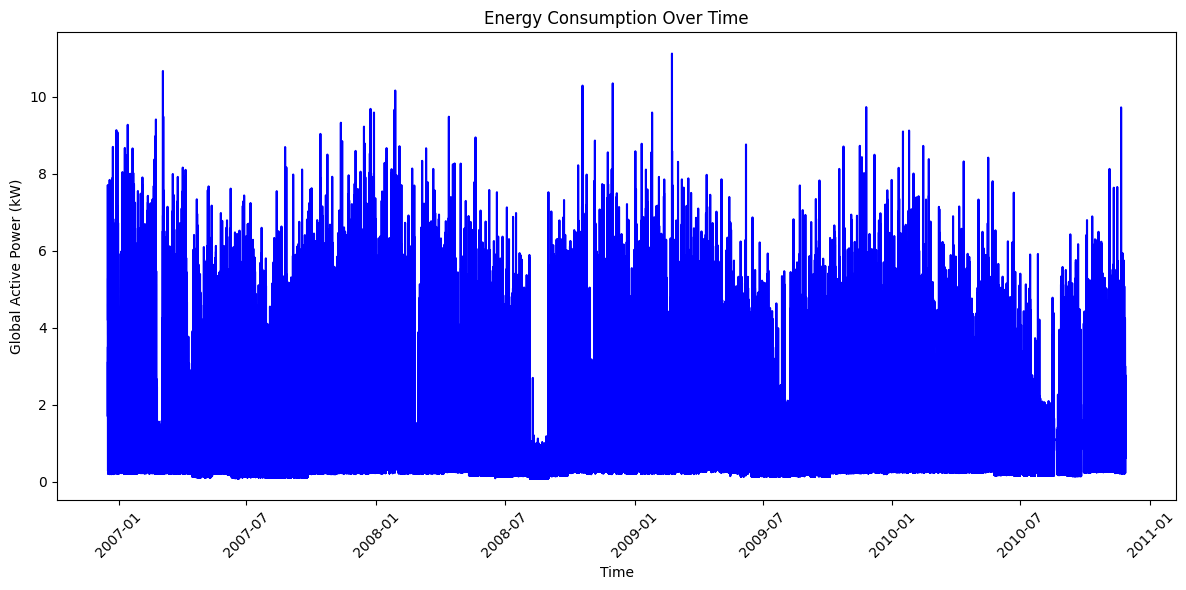

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Date_Time'], df['Global_active_power'], color='blue')
plt.title('Energy Consumption Over Time')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kW)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The graph shows consistent energy consumption from 2007 to 2011 with regular peaks, likely due to seasonal or daily patterns. Sharp drops, particularly in mid-2008 and mid-2010, suggest anomalies or maintenance periods. Overall, energy usage remains stable with frequent fluctuations but no clear upward or downward trend.

### Q(2) : What is the distribution of power usage for different sub-metering zones?

#### 2. Box Plot of Power Usage for Different Sub-Metering Zones :--

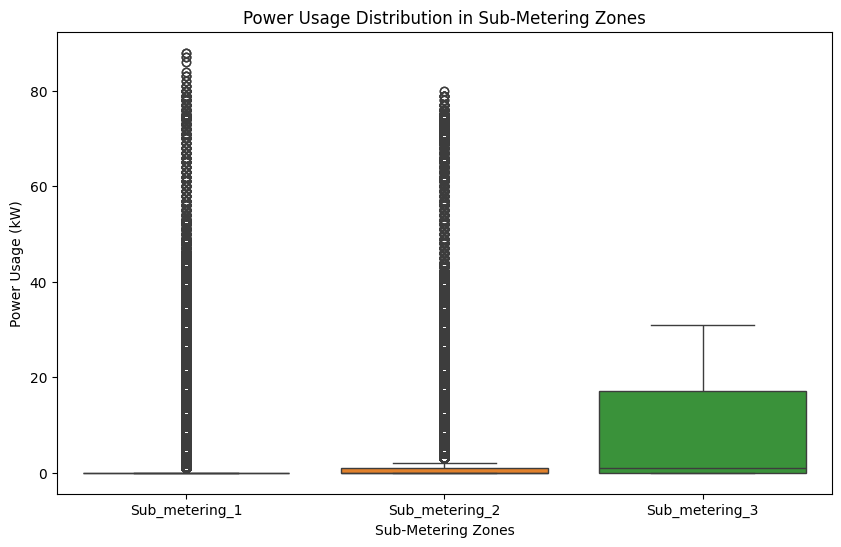

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']])
plt.title('Power Usage Distribution in Sub-Metering Zones')
plt.ylabel('Power Usage (kW)')
plt.xlabel('Sub-Metering Zones')
plt.show()


This distribution pattern suggests that Sub_metering_3 might be used for devices or areas with more consistent power needs, while Sub_metering_1 and Sub_metering_2 might be associated with less frequently used or intermittent high-power equipment.

### Q(3) : What is the distribution of global active power usage?

 Histogram of Global Active Power Consumption :--

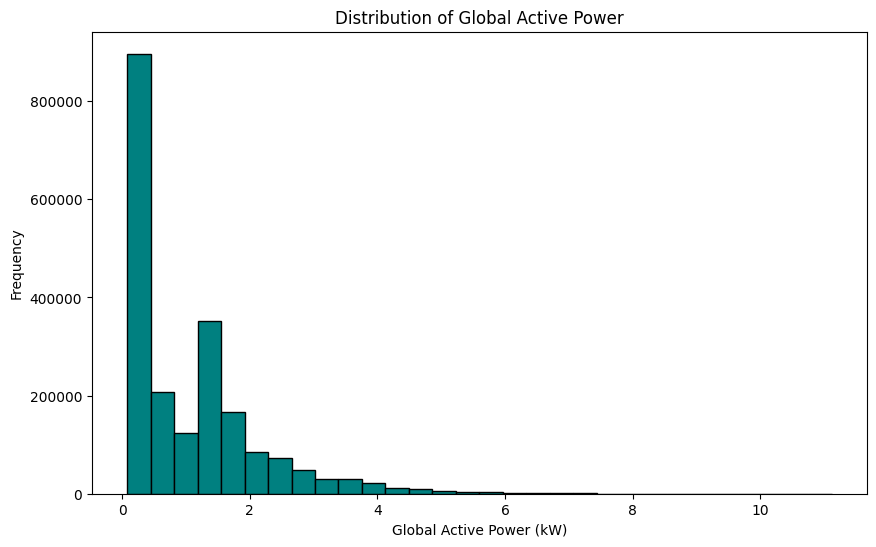

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Global_active_power'], bins=30, color='teal', edgecolor='black')
plt.title('Distribution of Global Active Power')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Frequency')
plt.show()


The histogram shows that most global active power values are low, with a right-skewed distribution. High power usage values are rare, indicating occasional peak demands.

### Q(4) : Is there a correlation between active and reactive power consumption?

Scatter Plot of Active vs. Reactive Power Consumption :--

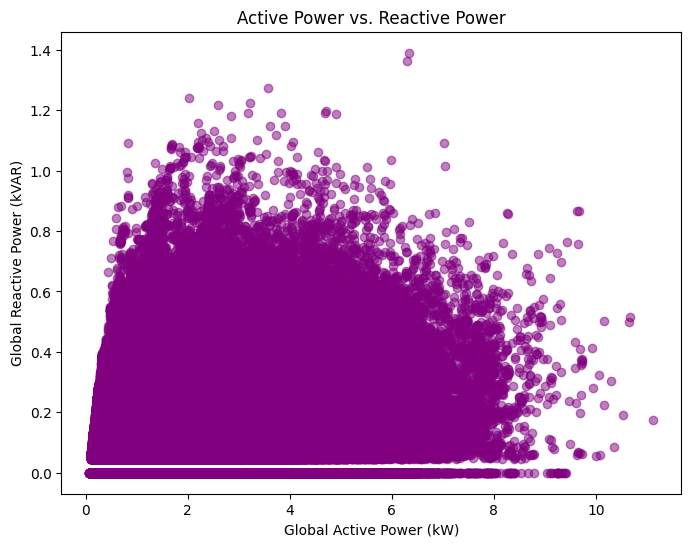

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Global_active_power'], df['Global_reactive_power'], color='purple', alpha=0.5)
plt.title('Active Power vs. Reactive Power')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Global Reactive Power (kVAR)')
plt.show()


The scatter plot shows a positive correlation between global active power and global reactive power. As active power increases, reactive power generally increases as well, but with considerable spread, especially at higher active power levels.

### Q(5) : What is the proportion of energy usage across the three sub-metering zones (Sub_metering_1, Sub_metering_2, and Sub_metering_3)?

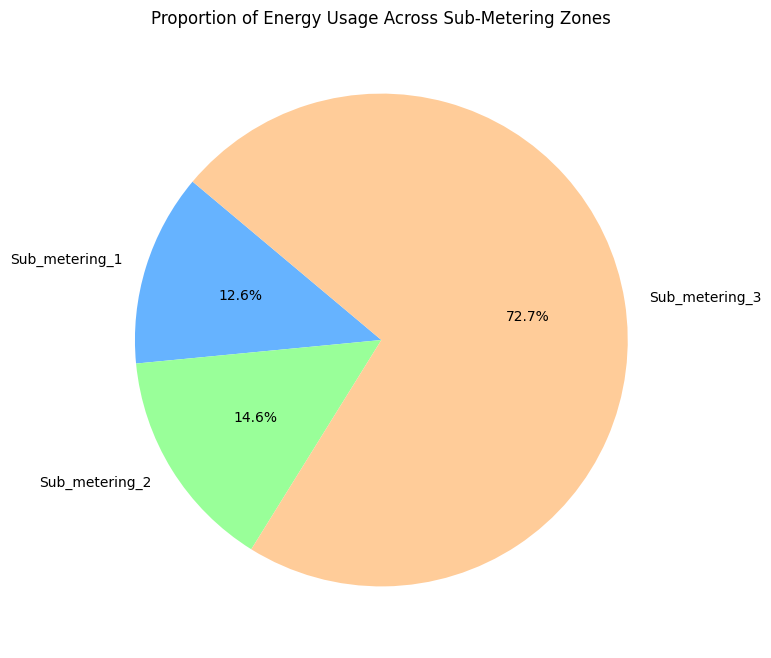

In [ ]:
import matplotlib.pyplot as plt

# Calculate total energy usage for each sub-metering zone
sub_metering_totals = [
    df['Sub_metering_1'].sum(),
    df['Sub_metering_2'].sum(),
    df['Sub_metering_3'].sum()
]

# Labels for each sub-metering zone
labels = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sub_metering_totals, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('Proportion of Energy Usage Across Sub-Metering Zones')
plt.show()


Sub_metering_3 typically has the largest share of energy usage, which may indicate a consistent load in that zone.
Sub_metering_1 and Sub_metering_2 often consume less energy compared to Sub_metering_3, possibly because they serve devices or areas with lower or less frequent usage.

### Q(6) : What are the relationships and potential correlations among Active Power, Reactive Power, and Voltage in the dataset?

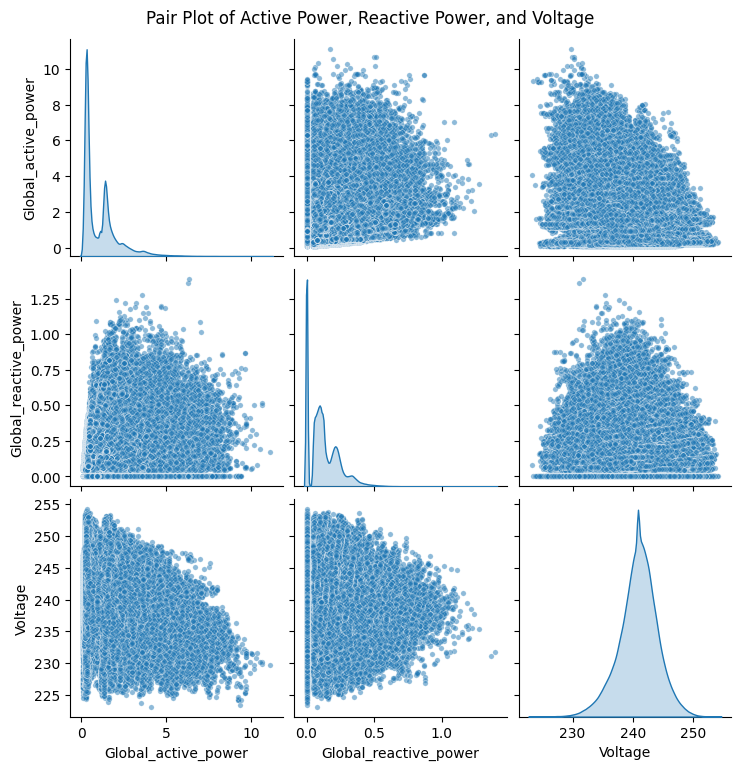

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting the relevant columns for the pair plot
columns_of_interest = ['Global_active_power', 'Global_reactive_power', 'Voltage']

# Creating the pair plot
sns.pairplot(df[columns_of_interest], diag_kind='kde', plot_kws={'alpha': 0.5, 's': 15})
plt.suptitle('Pair Plot of Active Power, Reactive Power, and Voltage', y=1.02)  # Adjust the title position
plt.show()


Global Active Power and Global Reactive Power are somewhat interdependent, while Voltage is relatively stable but may decrease slightly as power consumption (active or reactive) increases.

---

### Fundamental ML Models :--

In [ ]:
from sklearn.model_selection import train_test_split

# Check if the columns exist before attempting to drop them
columns_to_drop = ['Date', 'Date_Time', 'Time', 'Date_Time']
existing_columns = df.columns

# Only drop the columns that exist in the DataFrame
columns_to_drop = [col for col in columns_to_drop if col in existing_columns]

if columns_to_drop:  # Check if there are any columns to drop
    df.drop(columns=columns_to_drop, axis=1, inplace=True)

X = df.drop('Global_active_power', axis=1)
y = df['Global_active_power']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute,Is_holiday,Light,Is_Daylight
1347712,0.000,244.74,0.8,0.0,0.0,0.0,2009,7,9,15,16,0.0,1,1
378408,0.000,240.60,0.6,0.0,0.0,0.0,2007,9,5,12,12,0.0,1,1
280143,0.098,242.40,1.0,0.0,0.0,0.0,2007,6,29,6,27,0.0,1,1
670820,0.086,243.92,1.4,0.0,0.0,0.0,2008,3,26,13,44,0.0,1,1
1940013,0.098,244.25,1.8,0.0,1.0,1.0,2010,8,24,22,57,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0.256,241.69,1.6,0.0,1.0,0.0,2007,6,14,17,2,0.0,1,1
1414414,0.230,241.14,15.6,38.0,0.0,12.0,2009,8,24,22,58,0.0,0,0
131932,0.232,239.67,10.0,9.0,0.0,0.0,2007,3,18,8,16,1.0,1,1
671155,0.258,235.99,8.6,0.0,3.0,0.0,2008,3,26,19,19,0.0,0,0


* Droping unnecessary columns: Removes the 'Date', 'Date_Time', and 'Time' columns. The code makes sure that columns exists before dropping them.
* Defines features (X) and target variable (y): 'Global_active_power' is the target variable we want to predict; the remaining columns are features.
* Splits data: Divides the data into training and testing sets using train_test_split.

### 1. Linear Regression :--

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train) # fit is for model training
linear_reg_predictions = linear_reg.predict(X_test) # predict values for GAP
linear_reg_rmse = np.sqrt(mean_squared_error(y_test, linear_reg_predictions))
rmse=linear_reg_rmse*100
rmse

4.025595428094874

this code  trains a linear regression model to predict energy consumption (GAP) based on various input features. It then evaluates the model's accuracy using the RMSE metric.  The result is the RMSE, which quantifies the average difference between the predicted and actual values of GAP on the test dataset.

In [ ]:
accuracy = linear_reg.score(X_test, y_test)*100
accuracy

99.85326288302858

accuracy of linear regression is 99.8

Graph of linear Regression :--

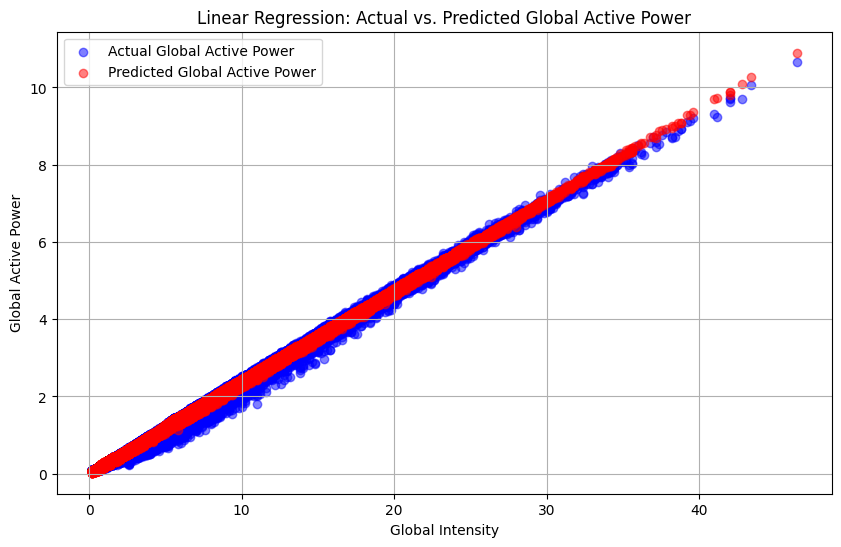

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_test['Global_intensity'], y_test, color='blue', label='Actual Global Active Power', alpha=0.5) # Actual values
plt.scatter(X_test['Global_intensity'], linear_reg_predictions, color='red', label='Predicted Global Active Power', alpha=0.5) # Predicted values
plt.xlabel('Global Intensity')
plt.ylabel('Global Active Power')
plt.title('Linear Regression: Actual vs. Predicted Global Active Power')
plt.legend()
plt.grid(True)
plt.show()

* This linear regression graph plots "Global Intensity" on the x-axis and "Global Active Power" on the y-axis.  Blue dots represent the *actual* Global Active Power values from the test dataset, while red dots represent the *predicted* Global Active Power values generated by the linear regression model.

* this model's predictive power by comparing actual and predicted Global Active Power values, using Global Intensity as the predictor.  The closer the red dots are to the blue dots, the better the linear regression model performs at predicting power consumption based on intensity.

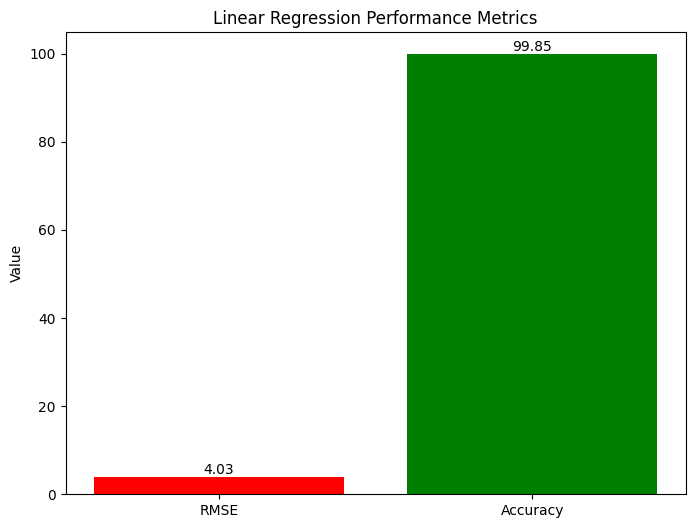

In [ ]:
# Data for the plot
metrics = ['RMSE', 'Accuracy']
values = [rmse, accuracy]

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['red', 'green'])
plt.title('Linear Regression Performance Metrics')
plt.ylabel('Value')

# Add labels to the bars
for i, v in enumerate(values):
    plt.text(i, v + 0.01 , str(round(v,2)), ha='center', va='bottom')

plt.show()

The bar chart gives a quickoverview of the linear regression model's performance. Comparing the height of the RMSE bar with the accuracy percentage helps understand the model

### 2. Lasso Regression :--

In [ ]:
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
lasso_predictions = lasso_reg.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_predictions))
lasso_rmse_percentage = lasso_rmse * 100
lasso_accuracy = lasso_reg.score(X_test, y_test) * 100
print(f"Lasso RMSE: {lasso_rmse_percentage:.2f}%")
print(f"Lasso Accuracy: {lasso_accuracy:.2f}%")

Lasso RMSE: 23.30%
Lasso Accuracy: 95.08%


this code  trains a Lasso regression model to predict energy consumption (GAP) based on various input features. It then evaluates the model's accuracy using the RMSE metric.  The result is the RMSE, which quantifies the average difference between the predicted and actual values of GAP on the test dataset. And the accuracy of this model is 95.08%

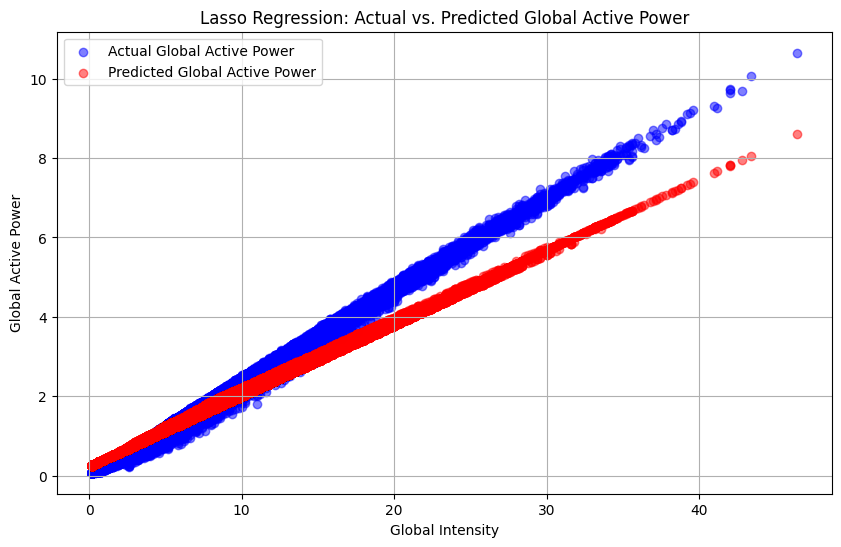

In [ ]:
# Plotting for Lasso Regression
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Global_intensity'], y_test, color='blue', label='Actual Global Active Power', alpha=0.5)
plt.scatter(X_test['Global_intensity'], lasso_predictions, color='red', label='Predicted Global Active Power', alpha=0.5)
plt.xlabel('Global Intensity')
plt.ylabel('Global Active Power')
plt.title('Lasso Regression: Actual vs. Predicted Global Active Power')
plt.legend()
plt.grid(True)
plt.show()

The Lasso regression plot shows the relationship between actual and predicted global active power against global intensity.  Similar to the linear regression plot, it visualizes model accuracy.  The proximity of red (predicted) points to blue (actual) points indicates the model's predictive power, while scattered points reveal less accurate predictions.  Comparing this plot to the linear regression plot allows evaluation of whether Lasso's regularization improved the model.

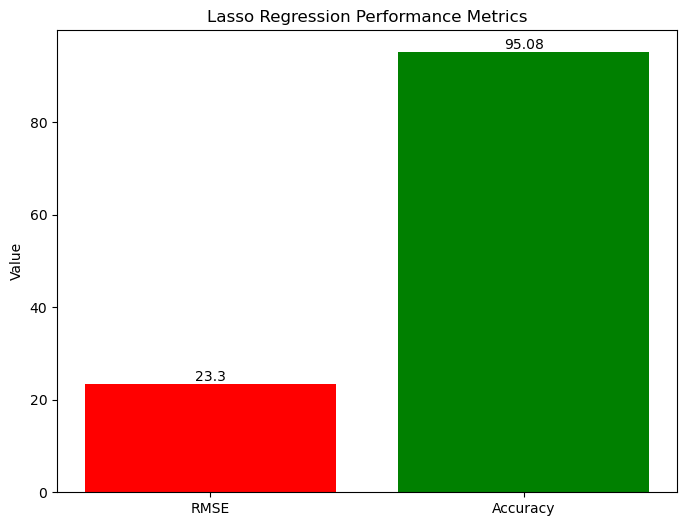

In [ ]:
# Bar chart for Lasso Regression
metrics = ['RMSE', 'Accuracy']
values = [lasso_rmse_percentage, lasso_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['red', 'green'])
plt.title('Lasso Regression Performance Metrics')
plt.ylabel('Value')

for i, v in enumerate(values):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')

plt.show()

The bar chart gives a quickoverview of the linear regression model's performance. Comparing the height of the RMSE bar with the accuracy percentage helps understand the model

### 3. Ridge Regression :--

In [ ]:
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
ridge_predictions = ridge_reg.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))
ridge_rmse_percentage = ridge_rmse * 100
ridge_accuracy = ridge_reg.score(X_test, y_test) * 100

print(f"Ridge RMSE: {ridge_rmse_percentage:.2f}%")
print(f"Ridge Accuracy: {ridge_accuracy:.2f}%")

Ridge RMSE: 4.03%
Ridge Accuracy: 99.85%


this code  trains a Ridge regression model to predict energy consumption (GAP) based on various input features. It then evaluates the model's accuracy using the RMSE metric.  The result is the RMSE, which quantifies the average difference between the predicted and actual values of GAP on the test dataset. And the accuracy of this model is 99.85%

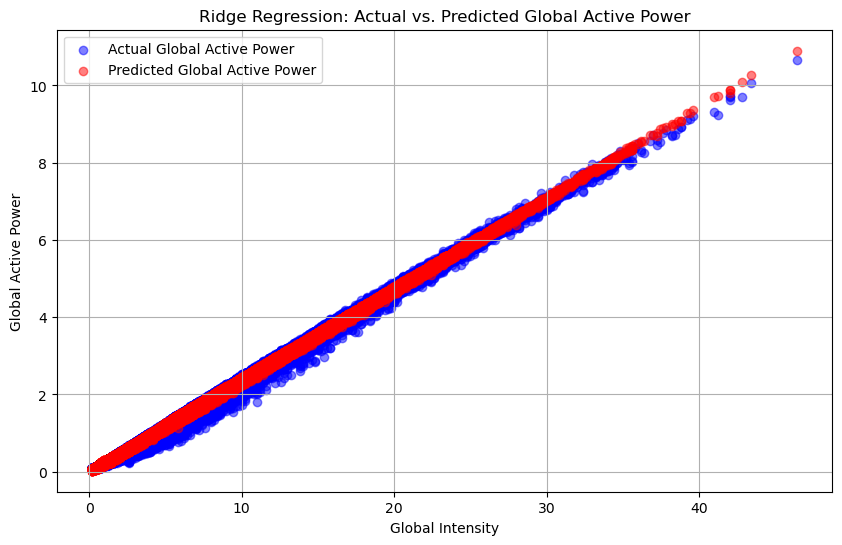

In [ ]:
# Plotting for Ridge Regression
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Global_intensity'], y_test, color='blue', label='Actual Global Active Power', alpha=0.5)
plt.scatter(X_test['Global_intensity'], ridge_predictions, color='red', label='Predicted Global Active Power', alpha=0.5)
plt.xlabel('Global Intensity')
plt.ylabel('Global Active Power')
plt.title('Ridge Regression: Actual vs. Predicted Global Active Power')
plt.legend()
plt.grid(True)
plt.show()

The Ridge regression plot displays the model's predictions against actual global active power values, plotted against global intensity.  Similar to the linear and Lasso regression plots, the red (predicted) points' closeness to the blue (actual) points visually represents the model's accuracy.  The effectiveness of Ridge regularization, compared to linear regression and Lasso, is evident in the scatter of points around the ideal diagonal.  Lower scatter suggests improved fit.  The accompanying RMSE and accuracy metrics offer quantitative measures for evaluating the Ridge model's performance.

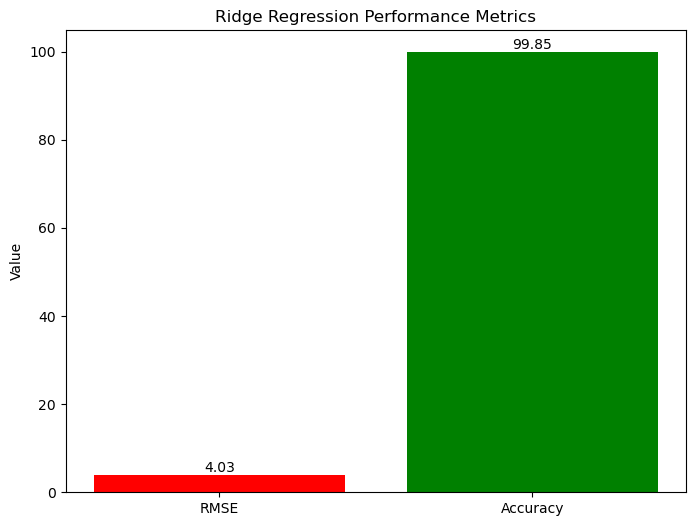

In [ ]:
# Bar chart for Ridge Regression
metrics = ['RMSE', 'Accuracy']
values = [ridge_rmse_percentage, ridge_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['red', 'green'])
plt.title('Ridge Regression Performance Metrics')
plt.ylabel('Value')

for i, v in enumerate(values):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')

plt.show()

The bar chart gives a quickoverview of the linear regression model's performance. Comparing the height of the RMSE bar with the accuracy percentage helps understand the model

### 4. Comparision :--

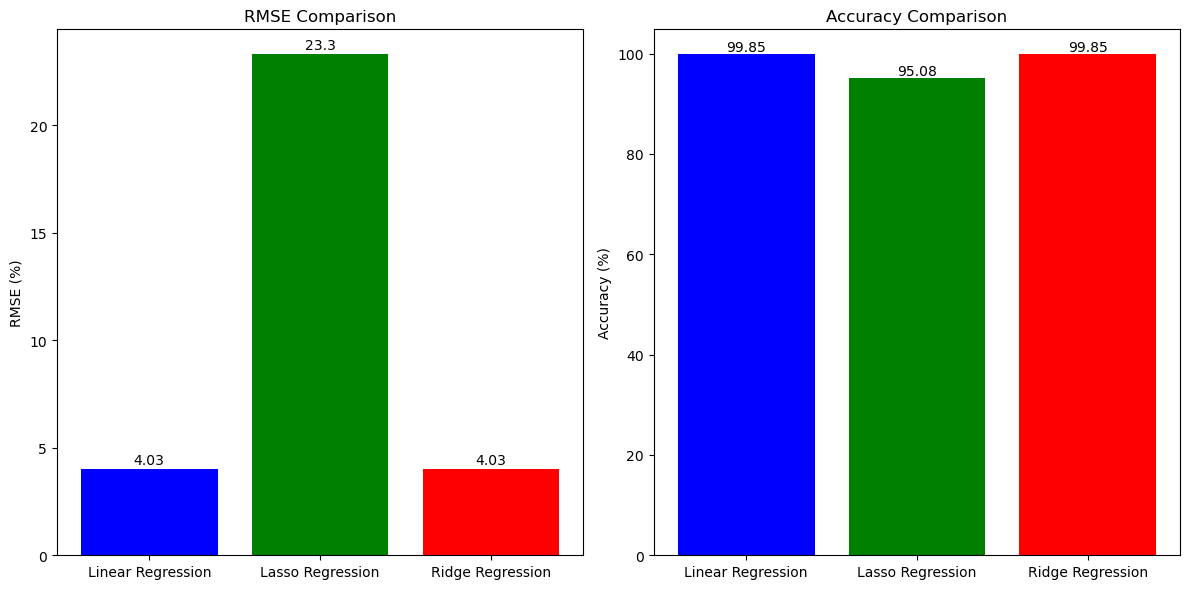

Model Comparison:
Linear Regression:
- RMSE: 4.03%
- Accuracy: 99.85%
--------------------
Lasso Regression:
- RMSE: 23.30%
- Accuracy: 95.08%
--------------------
Ridge Regression:
- RMSE: 4.03%
- Accuracy: 99.85%
--------------------


In [ ]:
# Compare model performance
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression']
rmse_values = [rmse, lasso_rmse_percentage, ridge_rmse_percentage]
accuracy_values = [accuracy, lasso_accuracy, ridge_accuracy]

plt.figure(figsize=(12, 6))

# RMSE comparison
plt.subplot(1, 2, 1)
plt.bar(models, rmse_values, color=['blue', 'green', 'red'])
plt.title('RMSE Comparison')
plt.ylabel('RMSE (%)')
for i, v in enumerate(rmse_values):
    plt.text(i, v + 0.1, str(round(v, 2)), ha='center', va='bottom')

# Accuracy comparison
plt.subplot(1, 2, 2)
plt.bar(models, accuracy_values, color=['blue', 'green', 'red'])
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy (%)')
for i, v in enumerate(accuracy_values):
    plt.text(i, v + 0.1, str(round(v, 2)), ha='center', va='bottom')

plt.tight_layout()
plt.show()


print("Model Comparison:")
for i in range(3):
    print(f"{models[i]}:")
    print(f"- RMSE: {rmse_values[i]:.2f}%")
    print(f"- Accuracy: {accuracy_values[i]:.2f}%")
    print("-" * 20)

Based on this comparison, we can determine which model is the most suitable for the prediction task.
basically The model with the lowest RMSE and highest accuracy is generally preferred.
from this we can observe both linear regression and ridge regression have same rmse and accuraictions.

---

### Data Forcasting :--

# 1. ARIMA (Auto Regressive Integrated Moving Average) Model :--

# a) ARIMA Parameters :-
* ARIMA (Autoregressive Integrated Moving Average) is a popular time series forecasting model.
* It combines three components:

#### 1. Autoregression (AR):
*    - Uses past values of the time series to predict future values.
*    - The "p" parameter in ARIMA(p, d, q) specifies the order of the autoregressive model,
*      representing the number of lagged observations included in the model.
*    - Formula:  X(t) = c + φ₁X(t-1) + φ₂X(t-2) + ... + φₚX(t-p) + ε(t)
*      where:
*        - X(t) is the value at time t
*        - c is a constant
*        - φ₁, φ₂, ..., φₚ are autoregressive coefficients
*        - ε(t) is the error term at time t


#### 2. Integration (I):
* - The "d" parameter represents the degree of differencing applied to the time series to make it stationary.
*    - Stationarity means that the statistical properties of the time series (mean, variance) do not change over time.
*    - Differencing is the process of subtracting consecutive values in the time series.
*    - Formula:  ΔdX(t) = X(t) - X(t-d) (where d is the order of differencing)


#### 3. Moving Average (MA):
*    - Considers past forecast errors to predict future values.
*    - The "q" parameter specifies the order of the moving average model,
*      indicating the number of lagged forecast errors included.
*    - Formula: X(t) = c + ε(t) + θ₁ε(t-1) + θ₂ε(t-2) + ... + θqε(t-q)
*      where:
*        - θ₁, θ₂, ..., θq are moving average coefficients

# b) Math Behind ARIMA Model :-
* The general formula for an ARIMA(p, d, q) model can be expressed as:

* ΔdX(t) = c + φ₁ΔdX(t-1) + ... + φₚΔdX(t-p) + ε(t) + θ₁ε(t-1) + ... + θqε(t-q)

#### Model Identification:
* Determining the appropriate values for p, d, and q is crucial for model accuracy.
* Techniques such as ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots, along with AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) are used for this.

* Example (ARIMA(1, 1, 1)):
* ΔX(t) = c + φ₁ΔX(t-1) + ε(t) + θ₁ε(t-1)

* This indicates that the model uses one lagged differenced value (AR part), one level of differencing to achieve stationarity (I part), and one lagged forecast error (MA part).

# c) Installation for ARIMA model :--

In [ ]:
!pip install statsmodels

In [ ]:
# prompt: ARIMA  model

import statsmodels.api as sm

# Assuming 'df' and 'X' are already defined from the previous code

# Fit the ARIMA model
# You'll need to determine the appropriate (p, d, q) order for your data
# This example uses (5,1,0) - replace with values suitable for your data
model = sm.tsa.ARIMA(df['Global_active_power'], order=(5,1,0)) # Example order, adjust as needed
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(X_train), end=len(df)-1) # Predict on test set

# Evaluate the model (example using RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(df['Global_active_power'][len(X_train):], predictions))
print(f"ARIMA RMSE: {rmse}")

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(df['Global_active_power'][len(X_train):], label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.title('ARIMA Model Predictions')
plt.show()


# Summary of the ARIMA model
print(model_fit.summary())

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

#  2. Prophet Model :--

# a) Parameters :--

Prophet is a time series forecasting model developed by Meta (formerly Facebook).  It's designed to handle time series data with strong seasonality and holiday effects, and it's particularly useful for business applications where these factors are significant.  Here's a breakdown of its key theoretical components:

**1. Additive Regression Model:** At its core, Prophet uses an additive regression model to forecast the time series.  This means it decomposes the time series into several components:

* **Trend:**  The long-term direction of the time series.  Prophet uses a piecewise linear or logistic growth model to capture the trend.  This allows the trend to change over time, reflecting periods of growth, decline, or saturation.  The piecewise approach uses changepoints—points in time where the trend might shift—to adjust the slope.  These changepoints are automatically detected by the algorithm, but can also be manually specified.

* **Seasonality:** Repeating patterns in the data at fixed frequencies (daily, weekly, yearly). Prophet models seasonality using Fourier series, which can represent complex cyclical patterns.  The model allows for different seasonality components for different time scales (e.g., daily seasonality, weekly seasonality).  The strength of these seasonal effects can also change over time.

* **Holidays:**  Effects of holidays or special events on the time series.  Users can provide a list of holidays with their dates, and the model will incorporate these into the forecast.  The impact of each holiday can be learned from the data.

* **Regressors:**  Additional external regressors that can be included in the model to explain variations not captured by the trend, seasonality, or holidays.  These regressors could be things like temperature, advertising spend, or economic indicators.


**2. Stan for Bayesian Inference:** Prophet utilizes the Stan probabilistic programming language for Bayesian inference. This means that rather than providing single point estimates, it produces a probability distribution for the forecast, allowing for quantification of uncertainty.   It estimates parameters (like the trend's slope, seasonality strengths, holiday effects) as probability distributions.

**3. Automatic Changepoint Detection:**  A crucial feature of Prophet is its ability to automatically detect changepoints in the trend.  This happens through a Bayesian approach that puts priors on the location and impact of changepoints.

**4. Handling Missing Data:** Prophet can deal with missing data points in the time series.

**5. Uncertainty Quantification:** The probabilistic nature of the model allows users to assess the uncertainty associated with their forecasts.

# b) How Prophet Works (in simpler terms):--

Imagine you're forecasting website traffic.  Prophet will:

1. **Identify the overall trend:** Is the traffic generally increasing, decreasing, or staying stable?  It might find that growth slows down after a certain point.

2. **Model the weekly and yearly seasonality:**  Traffic might peak during weekdays and decline on weekends.  There could be higher traffic during holidays.

3. **Account for holiday effects:**  Black Friday, for example, might have a noticeable impact on traffic.

4. **Combine all components:**  It combines the trend, seasonality, holidays, and any other regressors to generate a forecast.  Since it is a Bayesian model, it considers different combinations of trend, seasonality, and holiday effects and their probable impacts, thus generating an overall probability distribution for the forecast.

# c) Installation for Prophet Model :--

In [ ]:
!pip install prophet
from prophet import Prophet

In [ ]:
data.y.value_counts()

In [ ]:
df.Global_active_power.value_counts()

In [ ]:
train_size = int(len(data) * 0.8)  # 80% of data for training
train_df = data[:train_size]
test_df = data[train_size:]

model = Prophet()
model.fit(train_df)

future_dates_7days = model.make_future_dataframe(periods=7) # weekly prediction
future_dates_30days = model.make_future_dataframe(periods=30) # monthly prediction

predictions_7days = model.predict(future_dates_7days)
predictions_30days = model.predict(future_dates_30days)

In [ ]:
# Now you can access predictions
print(predictions_7days[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
print(predictions_30days[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

In [ ]:
fig, ax = plt.subplots(figsize=(25, 6))
model.plot(predictions_7days, ax=ax)
plt.title('7-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()




 - Overall trend:  Observe if the forecast shows an increasing, decreasing, or stable trend in global active power over the next 7 days.
 - Peaks and troughs:  Identify any significant peaks or dips in the predicted power usage.
 - Confidence intervals: Pay attention to the shaded areas around the forecast line. These represent confidence intervals, showing the range of uncertainty in the predictions.  Wider intervals suggest lower confidence in the forecast.
 - Comparison to past data: (if available in the plot) Compare the forecast to the observed historical data to understand how the forecast deviates from past patterns.
 - External factors: Consider any known external events (holidays, weather patterns, etc.) that might affect energy consumption and compare them to the predictions.

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
model.plot(predictions_30days, ax=ax)
plt.title('30-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


*  The predicted values (yhat) show a general increasing trend over the next 30 days, with some fluctuations.
*  The uncertainty intervals (yhat_lower and yhat_upper) appear to be relatively narrow, suggesting moderate confidence in the predictions, especially towards the end of the forecast period.
*  There is a potential peak in the predictions around the 15th day of the forecast, which could be further investigated.



In [ ]:
predictions_30days.columns

In [ ]:
model.plot_components(predictions_30days);

# d) Explanation of Prophet :--
* Trend: The trend component of Prophet's time series decomposition indicates the long-term direction of the data.  Observe if the trend is upward, downward, or flat. The plot_components function illustrates the trend visually.

* Seasonality: Prophet automatically identifies and models seasonality patterns. The component plots show daily, weekly, and yearly seasonalities (if present). Look for the amplitude of seasonal variations.

* Patterns: Analyze unusual patterns or outliers in the data that deviate significantly from the predicted trend and seasonality. This will help understand the unpredictable events that affect the energy consumption.

* ARIMA Parameter Explanations
* (p, d, q) - This represents the order of the model, which comprises three parameters:
* p:  Autoregressive (AR) order.  Indicates how many past values of the series are used to predict the current value.
* d:  Integrated (I) order.  The number of times the series needs to be differenced to become stationary. Stationarity implies that the mean and variance remain constant over time.
* q:  Moving Average (MA) order.  Specifies how many past forecast errors are used to predict the current value.


* Math behind ARIMA (brief summary)
* ARIMA models time series data based on the relationships between past and present data points.
* AR component: A linear combination of previous observations of the series, weighted by parameters phi (Φ).
* I component: Differencing the series to make it stationary.
* MA component: A weighted average of past errors (residuals). The weights are called theta (Θ).

* The overall equation looks like:
* x(t) = c + Φ₁x(t-1) + ... + Φₚx(t-p) + Θ₁e(t-1) + ... + Θ𝑞e(t-q) + e(t)
* x(t): The value at time t
* c: A constant
* Φ: AR parameters
* Θ: MA parameters
* e(t):  White noise error at time t

* **In summary :** Prophet offers a robust framework for time series forecasting by leveraging a flexible model structure that handles trend, seasonality, holidays, and regressors effectively.  Its Bayesian approach to parameter estimation and automatic changepoint detection further enhance its ability to produce reliable forecasts with uncertainty estimates.

### Component Analysis :--

In [ ]:

df['Date_Time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Set the 'Date_Time' column as the index
df = df.set_index('Date_Time')

# Resample the data to different time frequencies and calculate the maximum for each period
daily_max = df['Global_active_power'].resample('D').max()
weekly_max = df['Global_active_power'].resample('W').max()
monthly_max = df['Global_active_power'].resample('M').max()
yearly_max = df['Global_active_power'].resample('Y').max()

# Print the results
print("Daily Maximum Power Consumption:")
print(daily_max)
print("\nWeekly Maximum Power Consumption:")
print(weekly_max)
print("\nMonthly Maximum Power Consumption:")
print(monthly_max)
print("\nYearly Maximum Power Consumption:")
print(yearly_max)



# Plot the maximum power consumption over time
plt.figure(figsize=(12, 6))
plt.plot(daily_max.index, daily_max.values, label='Daily Max')
plt.plot(weekly_max.index, weekly_max.values, label='Weekly Max')
plt.plot(monthly_max.index, monthly_max.values, label='Monthly Max')
plt.plot(yearly_max.index, yearly_max.values, label='Yearly Max')
plt.xlabel('Time')
plt.ylabel('Maximum Global Active Power')
plt.title('Maximum Power Consumption Over Time')
plt.legend()
plt.grid(True)
plt.show()

#### Daily Maximum Power Consumption :--
* Observation: The maximum daily power consumption varies significantly, ranging from approximately 4.242 kW to 11.122 kW.
* Time of Peak Consumption: Daily peaks are likely to occur during times of high household or industrial activity, such as:
* Morning (6–9 AM): High power use for cooking, heating, or preparing for the day.
* Evening (5–9 PM): Peak usage due to lighting, entertainment, and household chores.
* Why?
*  These peaks align with human activity patterns, where demand increases during morning preparation and evening relaxation after work.

#### Weekly Maximum Power Consumption :--
* Observation: Weekly peaks show significant variation, with some weeks reaching values as high as 9.724 kW.
- Time of Peak Consumption:
* Likely during weekdays (Monday-Friday) when industrial and commercial activity is at its peak.
* Weekends may also show peaks depending on household activity patterns.
* Why?
* Weekly peaks often correlate with work schedules, industrial processes, and household routines.
* Specific events (e.g., festivals or holiday preparations) may also drive consumption spikes in certain weeks.

#### Monthly Maximum Power Consumption :--
* Observation: Monthly peaks show patterns tied to seasonal variations. For example:
* The highest monthly consumption (10.670 kW) occurs in March 2007, and other high peaks occur in winter months like November or February.
* Why?
* Winter Months: Increased heating demands in colder months (November–February).
* Summer Months: Possible spikes in regions requiring cooling (air conditioners, fans).
* Seasonal Factors: Holidays, industrial cycles, and agricultural demands can also influence monthly consumption.

#### Yearly Maximum Power Consumption :--
* Observation:
* The highest annual peak (11.122 kW) occurs in 2009, with a declining trend in 2010.
* Why 2009 Was the Highest?
* Economic or industrial growth during 2009 may have driven higher consumption.
* Specific events or seasonal extremes could have increased heating or cooling needs.
* In 2010, the decline might be attributed to:
* Increased energy efficiency measures.
* Reduced industrial output or economic slowdowns.
* Shifts to alternative energy sources or better power management.

In [ ]:
def preprocess_data(df):
    # Handle missing values
    df.fillna(df.mean(), inplace=True)

    # Extract datetime features
    df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')
    df['Year'] = df['datetime'].dt.year
    df['Month'] = df['datetime'].dt.month
    df['Day'] = df['datetime'].dt.day
    df['Hour'] = df['datetime'].dt.hour
    df['Minute'] = df['datetime'].dt.minute

    # Feature engineering
    df['Is_holiday'] = df['Date'].apply(lambda x: 1.0 if pd.to_datetime(x).weekday() >= 5 else 0.0)
    df['Light'] = df['Hour'].apply(lambda x: 1 if 6 <= x < 18 else 0)

    # Drop unnecessary columns
    df.drop(['Date', 'Time', 'datetime'], axis=1, inplace=True)
    return df


----

#### Installation of streamlit :--

In [ ]:
import joblib
#Save feature names
feature_names = df.drop('Global_active_power', axis=1).columns
joblib.dump(feature_names, 'feature_names.pkl')

print("Models and features saved successfully.")

In [ ]:
!pip install streamlit

### Application for Energy Consumption prediction :--

In [ ]:
def preprocess_data(df):
    # Handle missing values
    df.fillna(df.mean(), inplace=True)

    # Extract datetime features
    df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')
    df['Year'] = df['datetime'].dt.year
    df['Month'] = df['datetime'].dt.month
    df['Day'] = df['datetime'].dt.day
    df['Hour'] = df['datetime'].dt.hour
    df['Minute'] = df['datetime'].dt.minute

    # Feature engineering
    df['Is_holiday'] = df['Date'].apply(lambda x: 1.0 if pd.to_datetime(x).weekday() >= 5 else 0.0)
    df['Light'] = df['Hour'].apply(lambda x: 1 if 6 <= x < 18 else 0)

    # Drop unnecessary columns
    df.drop(['Date', 'Time', 'datetime'], axis=1, inplace=True)
    return df


In [ ]:
import joblib

# Save the models
joblib.dump(linear_reg, 'linear_model.pkl')
joblib.dump(ridge_reg, 'ridge_model.pkl')
# Load the models during deployment
linear_reg = joblib.load('linear_model.pkl')
ridge_reg= joblib.load('ridge_model.pkl')


In [1]:
!wget -q -O - ipv4.icanhazip.com

34.173.89.59


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501


/bin/bash: line 1: streamlit: command not found
⠙⠹⠸⠼⠴your url is: https://famous-ways-repair.loca.lt
^C
